### Primary data and visual data analysis

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import statsmodels.stats.api as sm

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
wine = pd.read_csv('winequality-red.csv')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


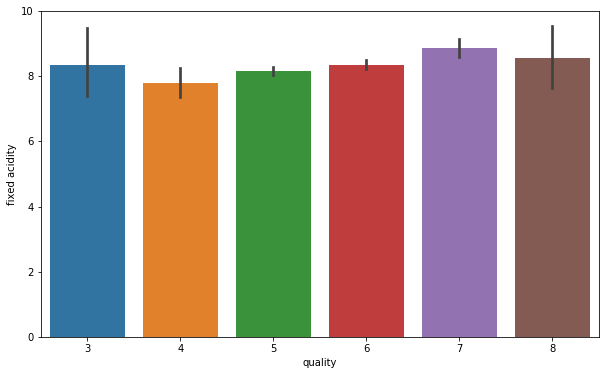

In [3]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'fixed acidity', data = wine)

Here we see that fixed acidity does not give any specification to classify the quality.

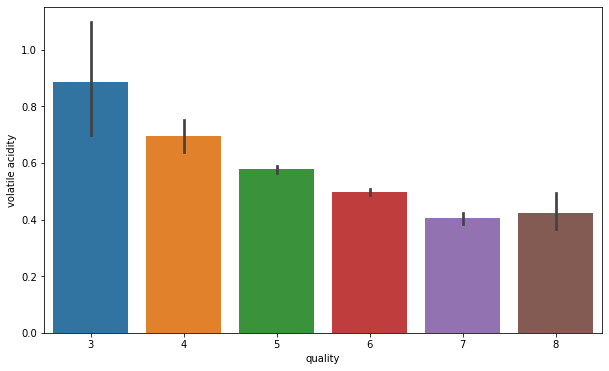

In [4]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'volatile acidity', data = wine)

Here we see that its quite a downing trend in the volatile acidity as we go higher the quality.

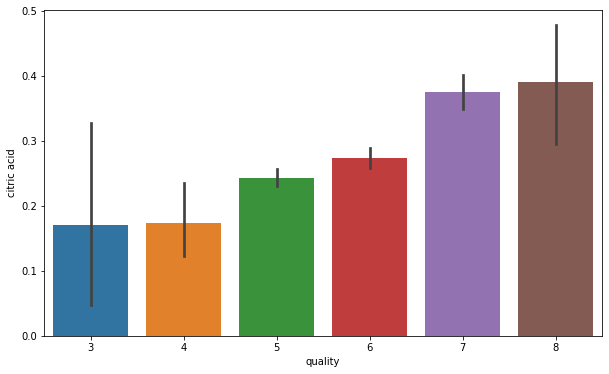

In [5]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'citric acid', data = wine)

Composition of citric acid go higher as we go higher in the quality of the wine.

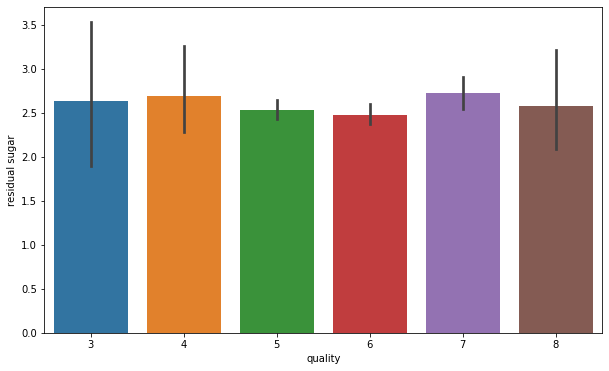

In [6]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'residual sugar', data = wine)

We can see, that hasn't got trend on sugar and quality.

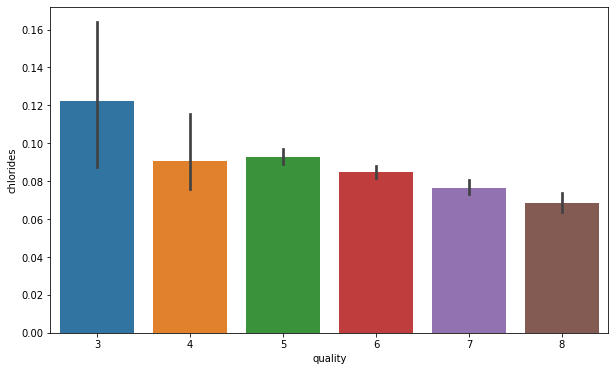

In [7]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'chlorides', data = wine)

Composition of chloride also go down as we go higher in the quality of the wine

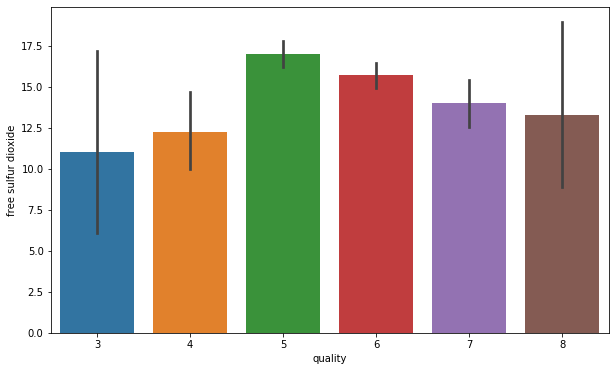

In [8]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = wine)

We can see, that hasn't got trend on free sulfur dioxide and quality.

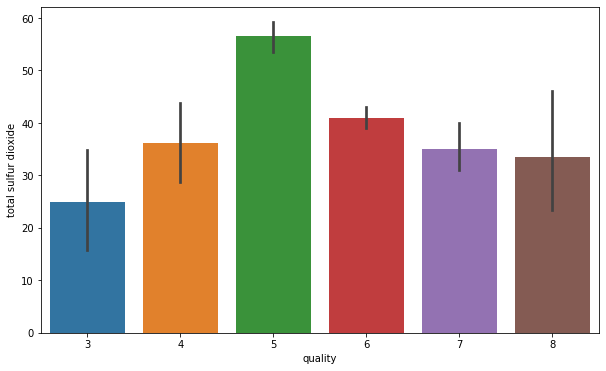

In [10]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = wine);

Higher the quantity, higher likely to have sulfur  

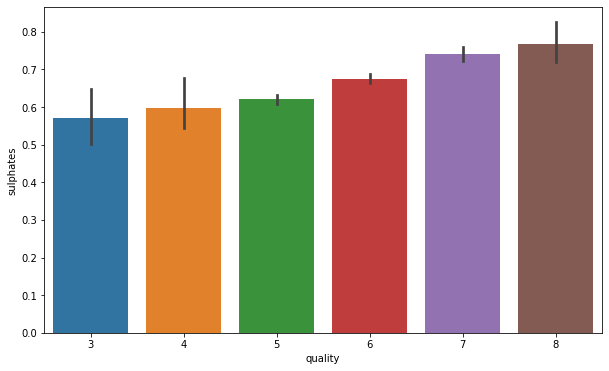

In [11]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'sulphates', data = wine);

Sulphates level goes higher with the quality of wine

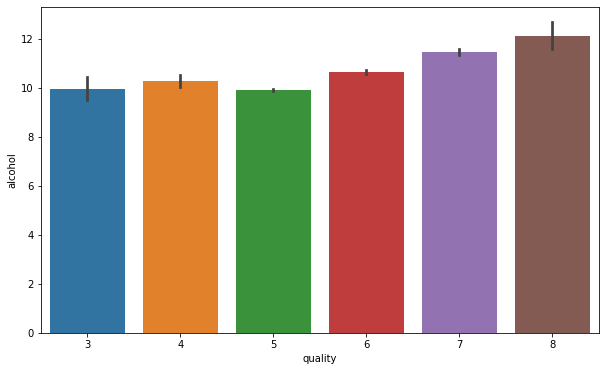

In [12]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'alcohol', data = wine)

Alcohol level also goes higher as te quality of wine increases

## Here is the distribution of expert assessments of wines in the sample:

Text(0.5, 0, 'Quality')

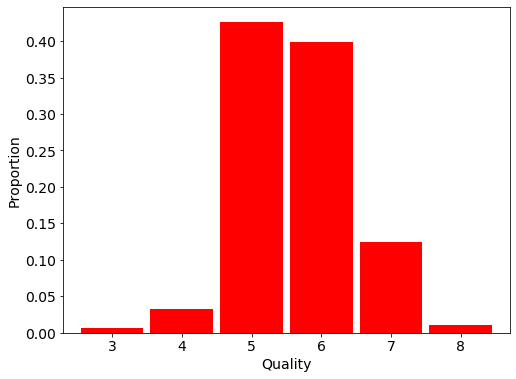

In [13]:
plt.figure(figsize(8,6))
stat = wine.groupby('quality')['quality'].agg(lambda x : float(len(x)) / wine.shape[0])
stat.plot(kind='bar', fontsize=14, width=0.9, color="red")
plt.xticks(rotation=0)
plt.ylabel('Proportion', fontsize=14)
plt.xlabel('Quality', fontsize=14)

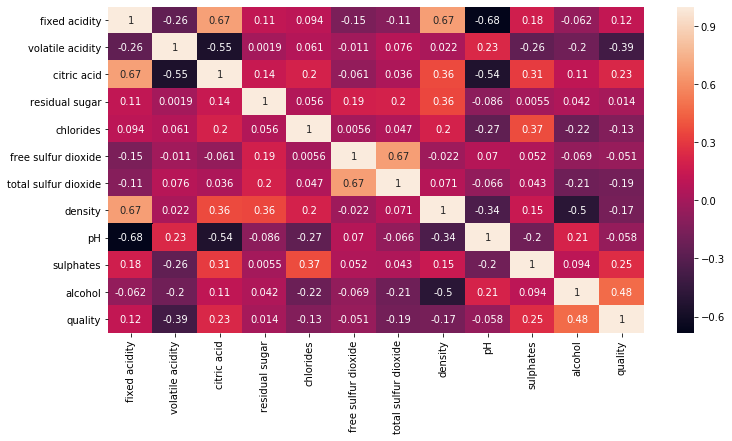

In [14]:
plt.figure(figsize=(12,6))
sns.heatmap(wine.corr(),annot=True)

Interesting, we can now see that acidity and pH level of wine are in inverse proportion. <br>
This result illustrates a fact from a chemisty: as we know, pH = -lg[H+], whehe [H+] in fact represents acidity. So, bigger acidity - lower pH level. 

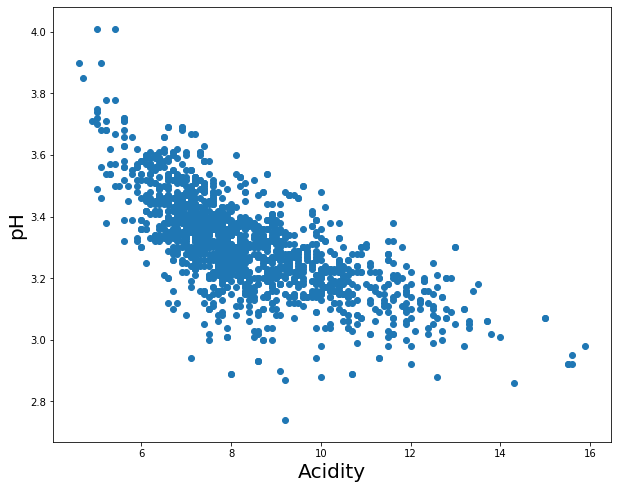

In [15]:
plt.figure(figsize=(10,8))
plt.scatter(wine['fixed acidity'],wine['pH'])
plt.xlabel('Acidity').set_size(20)
plt.ylabel('pH').set_size(20)

From the graph we can see, there is no direct connection between total acidity and pH (it is possible to find wines with a high pH for wine and high acidity)

### Insights and found dependencies

Summarise previous results, we can see that:
- data is normally disturbuted;
- we can find dependency between volatile acidity/citric acid/chlorides/sulphates/alcohol and quality of wine, we can use that in our model (very good for logistic regression);

### Model selection

- **LogisticRegression**
- **RandomForest**
- **K-nearest neighbor**
- **Decision Tree**
- **Support Vector Machine**

### Data Processing

In [16]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [17]:
# Start Modeling
# Split Training and Testing data (within training data file only)
# Hold out method validation

from sklearn.model_selection import train_test_split

X_train = wine.iloc[:,1:len(wine.columns)-2] # this represents the input Features
Y_train = wine.loc[:,'quality']


# Scaling features (only feature NOT observation)
from sklearn.preprocessing import MinMaxScaler, StandardScaler
# Scaling - brings to range (0 to 1)
ScaleFn = MinMaxScaler()
X_Scale = ScaleFn.fit_transform(X_train)
# Standardise - brings to Zero mean, Unit variance
ScaleFn = StandardScaler()
X_Strd = ScaleFn.fit_transform(X_train)

In [18]:
from sklearn.decomposition import PCA
pca = PCA()
x_pca = pca.fit_transform(X_Strd)

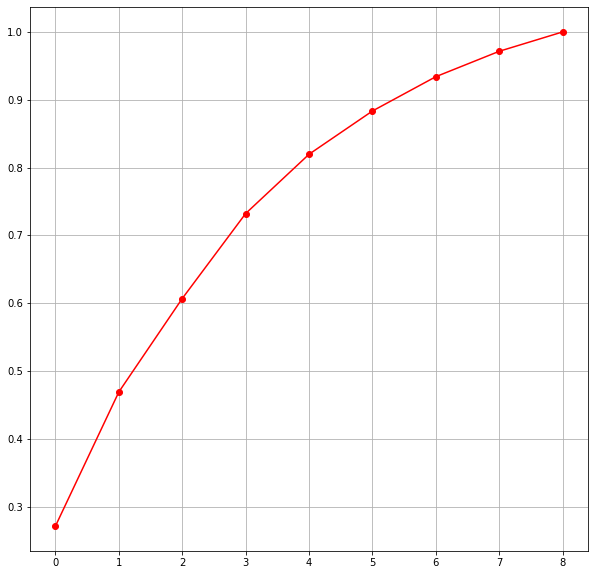

In [19]:
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.grid()

AS per the graph, we can see that 7 principal components attribute for 90% of variation in the data. <br>
We shall pick the first 7 components for our prediction.

In [20]:
pca_new = PCA(n_components=8)
x_new = pca_new.fit_transform(X_Strd)
print(x_new)

[[-1.85550029 -0.11566443 -1.09357046 ... -0.75643601 -0.54724227
  -0.12543802]
 [-0.80070544  1.49109015 -1.17367872 ... -0.24160267  1.08018456
  -0.54859163]
 [-0.84153176  0.44660569 -1.03827391 ... -0.2839886   0.65509512
  -0.22355232]
 ...
 [-0.75716274  0.69393496  0.80821779 ... -0.22768437  0.05590351
  -0.79624827]
 [-1.63220619  1.13054855  0.63442137 ... -0.43474156 -0.40891784
  -0.41109861]
 [ 0.4677948  -0.11499324  1.1798357  ...  0.6522725  -0.23266225
   0.34922552]]


In [21]:
X_train,X_test,Y_train,Y_test = train_test_split(x_new,Y_train,test_size = .30, random_state = 11)

## Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression

In [65]:
regressor = LogisticRegression()

In [66]:
regressor.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [67]:
from sklearn.metrics import accuracy_score

In [68]:
print('Accuracy of LogisticRegression :{}'.format(accuracy_score(regressor.predict(X_test), Y_test)*100),"%")

Accuracy of LogisticRegression :55.208333333333336 %


## Decision Tree

In [69]:
from sklearn.tree import DecisionTreeClassifier

In [70]:
classifier = DecisionTreeClassifier().fit(X_train, Y_train)

In [71]:
print('Accuracy of Decision Tree :{}'.format(accuracy_score(classifier.predict(X_test), Y_test)*100),"%")

Accuracy of Decision Tree :57.291666666666664 %


## K-nearest neighbor

In [72]:
from sklearn.neighbors import KNeighborsClassifier

In [73]:
classifier = KNeighborsClassifier().fit(X_train, Y_train)

In [74]:
print('Accuracy of KNN :{}'.format(accuracy_score(classifier.predict(X_test), Y_test)*100),"%")

Accuracy of KNN :54.166666666666664 %


## Random Forest

In [75]:
from sklearn.ensemble import RandomForestClassifier

In [76]:
classifier = RandomForestClassifier().fit(X_train, Y_train)

In [83]:
print('Accuracy of Random Forest :{}'.format(accuracy_score(classifier.predict(X_test), Y_test)*100),"%")

Accuracy of Random Forest :62.5 %


## Support Vector Machine

In [78]:
from sklearn.svm import SVC

In [79]:
classifier = SVC().fit(X_train, Y_train)

In [80]:
print('Accuracy of SVM :{}'.format(accuracy_score(classifier.predict(X_test), Y_test)*100),"%")

Accuracy of SVM :62.5 %


## Different models in stack

In [82]:
test_size = .30
seedNo = 11

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

mymodel = []
mymodel.append(('LogReg', LogisticRegression()))
mymodel.append(('KNN', KNeighborsClassifier()))
mymodel.append(('DeciTree', DecisionTreeClassifier()))
mymodel.append(('RandForest', RandomForestClassifier()))
mymodel.append(('SVM', SVC()))
#mymodel.append(('XGBoost', XGBClassifier()))



All_model_result = []
All_model_name = []
for algoname, algorithm in mymodel:    
    kfoldFn = KFold(n_splits = 11, random_state = seedNo)
    Eval_result = cross_val_score(algorithm, X_train, Y_train, cv = kfoldFn, scoring = 'accuracy')
    
    All_model_result.append(Eval_result)
    All_model_name.append(algoname)
    print("Modelname and Model accuracy:", algoname, 100*Eval_result.mean(),"%")

Modelname and Model accuracy: LogReg 54.50927445685744 %
Modelname and Model accuracy: KNN 55.67939146855863 %
Modelname and Model accuracy: DeciTree 55.94059405940593 %
Modelname and Model accuracy: RandForest 61.66057782248813 %
Modelname and Model accuracy: SVM 59.42623674132119 %


### Conclusions

- use models individually rather than stacking model;
- generate new features;
- find more insights;
- use other metrics and models.
